 # 1. 安裝與導入

In [3]:
# !pip install seaborn pandas matplotlib numpy pandas  statsmodels scipy

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 讓中文圖例正常顯示
rcParams['font.sans-serif'] = ['Microsoft JhengHei']   # Windows
# rcParams['font.sans-serif'] = ['Noto Sans CJK TC']   # Linux/Mac
rcParams['axes.unicode_minus'] = False

 # 2. 準備資料（營收 + 產業別）

In [8]:
# 亂數種子可固定，方便大家看到相同結果
np.random.seed(0)

# 50 筆營收資料（64~128 之間，呼應筆記裡的範例）
revenue = np.random.randint(64, 129, size=50)

# 對應的產業別（類別資料）
industry = np.random.choice(['電子', '傳產', '金融', '生技'], size=50)

df = pd.DataFrame({'營收': revenue, '產業': industry})
# 前5筆資料
df.head()

,營收,產業
0,108,金融
1,111,生技
2,128,傳產
3,73,電子
4,85,傳產
5,100,金融
6,76,電子
7,122,生技
8,103,電子
9,110,金融


# 3. 建立「次數分配表」（數量資料）

In [9]:
# 3.1 手動版：照筆記步驟自己切
R = df['營收'].max() - df['營收'].min()
k = 6                               # 先決定 6 組
width = np.ceil(R / k / 5) * 5      # 向上取 5 的倍數當組距

breaks = np.arange(df['營收'].min(), df['營收'].max() + width, width)
labels = [f'{int(b)}~{int(b+width)}' for b in breaks[:-1]]

df['組別'] = pd.cut(df['營收'], bins=breaks, right=False, labels=labels)

freq_tbl = (df['組別']
              .value_counts()
              .sort_index()
              .to_frame('次數')
              .assign(相對次數=lambda x: x['次數']/x['次數'].sum())
              .reset_index()
              .rename(columns={'index':'組別'}))

freq_tbl

,組別,次數,相對次數
0,64~79,12,0.24
1,79~94,9,0.18
2,94~109,16,0.32
3,109~124,11,0.22
4,124~139,2,0.04


# 4. 單一類別資料圖形

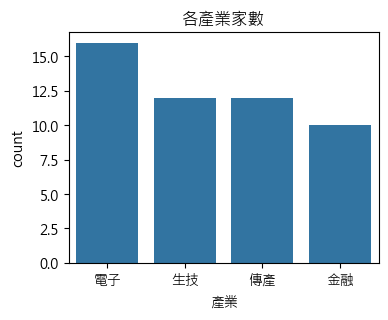

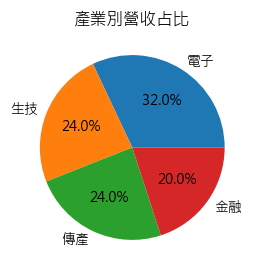

In [10]:
# 4.1 長條圖（產業家數）
plt.figure(figsize=(4,3))
sns.countplot(x='產業', data=df, order=df['產業'].value_counts().index)
plt.title('各產業家數')
plt.show()

# 4.2 圓餅圖
plt.figure(figsize=(4,3))
df['產業'].value_counts().plot.pie(autopct='%.1f%%')
plt.ylabel('')
plt.title('產業別營收占比')
plt.show()

# 5. 兩類別資料：交叉表 + 群組長條圖

產業,傳產,生技,金融,電子
組別,,,,
64~79,3,3,2,4
79~94,3,1,1,4
94~109,4,2,6,4
109~124,1,6,1,3
124~139,1,0,0,1


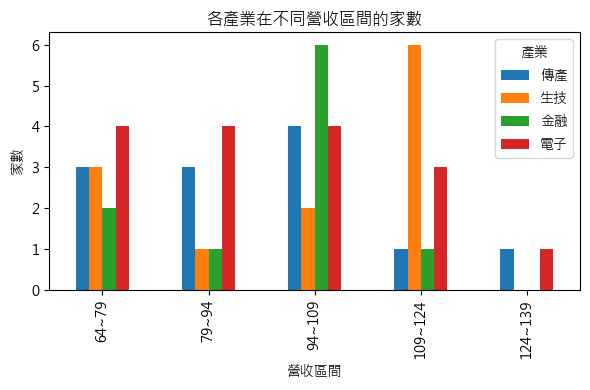

In [11]:
# 5.1 交叉表
cross = pd.crosstab(df['組別'], df['產業'])
display(cross)

# 5.2 群組長條圖
cross.plot(kind='bar', figsize=(6,4))
plt.title('各產業在不同營收區間的家數')
plt.ylabel('家數')
plt.xlabel('營收區間')
plt.legend(title='產業')
plt.tight_layout()
plt.show()

# 6. 數量資料直方圖 + 多邊圖 + 肩形圖（Ogive）

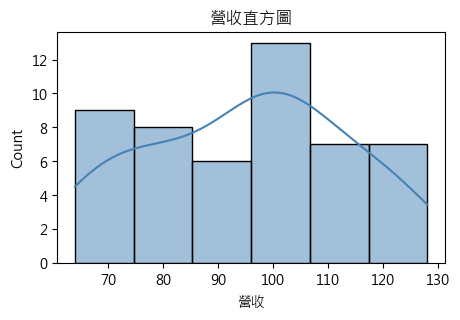

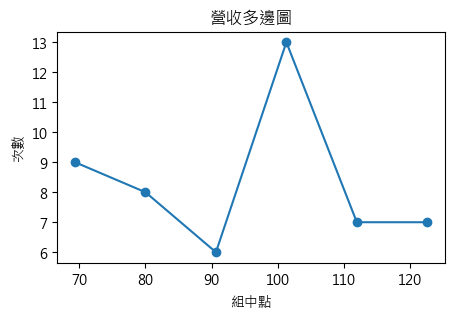

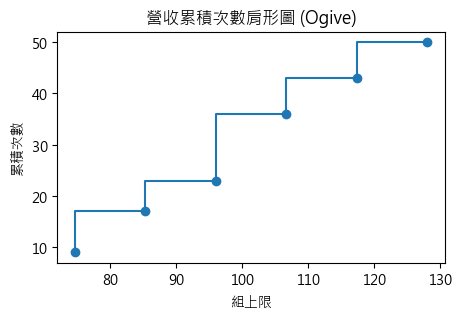

In [13]:
# 6.1 直方圖（含密度曲線）
plt.figure(figsize=(5,3))
sns.histplot(df['營收'], bins=6, kde=True, color='steelblue')
plt.title('營收直方圖')
plt.show()

# 6.2 多邊圖（折線連接組中點）
counts, bin_edges = np.histogram(df['營收'], bins=6)
midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(5,3))
plt.plot(midpoints, counts, marker='o')
plt.title('營收多邊圖')
plt.xlabel('組中點')
plt.ylabel('次數')
plt.show()

# 6.3 肩形圖（累積次數折線）
cumu = np.cumsum(counts)
plt.figure(figsize=(5,3))
plt.plot(bin_edges[1:], cumu, marker='o', drawstyle='steps-pre')
plt.title('營收累積次數肩形圖 (Ogive)')
plt.xlabel('組上限')
plt.ylabel('累積次數')
plt.show()

# 8. 柏拉圖（Pareto Chart）

In [14]:
# 8.1 計算「各產業家數」並由大→小排序
pareto = (df['產業']
          .value_counts()                 # 次數
          .to_frame('次數')
          .assign(累積百分比=lambda x: x['次數'].cumsum()/x['次數'].sum()*100))

pareto

,次數,累積百分比
產業,,
電子,16,32.0
生技,12,56.0
傳產,12,80.0
金融,10,100.0


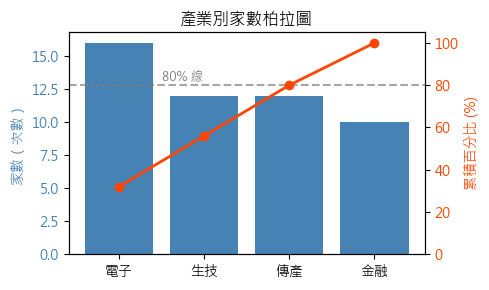

In [15]:
# 8.2 畫柏拉圖：雙軸
fig, ax1 = plt.subplots(figsize=(5,3))

# 左軸：長條圖
ax1.bar(pareto.index, pareto['次數'], color='steelblue', zorder=2)
ax1.set_ylabel('家數（次數）', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# 右軸：累積百分比折線
ax2 = ax1.twinx()
ax2.plot(pareto.index, pareto['累積百分比'],
         color='orangered', marker='o', linewidth=2, zorder=1)
ax2.set_ylabel('累積百分比 (%)', color='orangered')
ax2.tick_params(axis='y', labelcolor='orangered')
ax2.set_ylim(0, 105)

# 80% 參考線
ax2.axhline(y=80, color='gray', linestyle='--', alpha=0.7, zorder=0)
ax2.text(0.5, 82, '80% 線', color='gray', fontsize=9)

plt.title('產業別家數柏拉圖')
fig.tight_layout()
plt.show()

# 時間數列資料

時間數列資料範例:
前10天銷售數據:
                 sales        MA_7  MA_30
date                                     
2023-01-01  102.483571         NaN    NaN
2023-01-02   99.704241         NaN    NaN
2023-01-03  104.029492         NaN    NaN
2023-01-04  108.801532         NaN    NaN
2023-01-05  100.410720         NaN    NaN
2023-01-06  100.805600         NaN    NaN
2023-01-07  110.266765  103.785989    NaN
2023-01-08  106.601833  104.374312    NaN
2023-01-09  100.810711  104.532379    NaN
2023-01-10  106.263696  104.851551    NaN


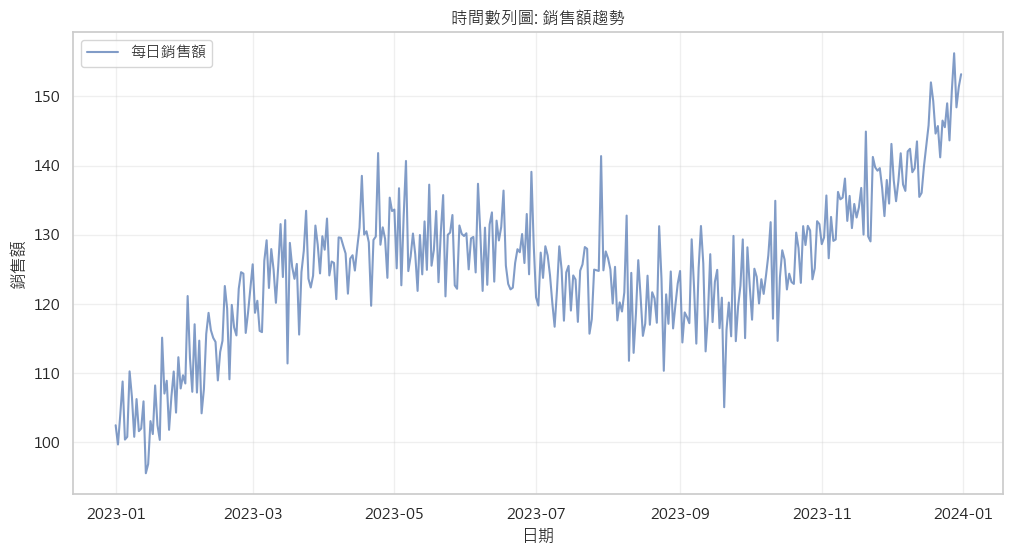


兩組數量資料範例:
兩變量數據前10行:
     ad_spend        sales
0  726.822267  2414.929268
1  357.525401  1617.627837
2  304.166308  1131.007238
3  596.183292  1886.579409
4  747.522073  2543.176405
5  480.795814  1622.183262
6  982.687779  2959.687769
7  716.346765  2397.798509
8  532.838711  1921.167417
9  452.905766  1807.753034
廣告支出與銷售額的相關係數: 0.978


C:\Users\jeffg\AppData\Local\Temp\ipykernel_29656\2959859908.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


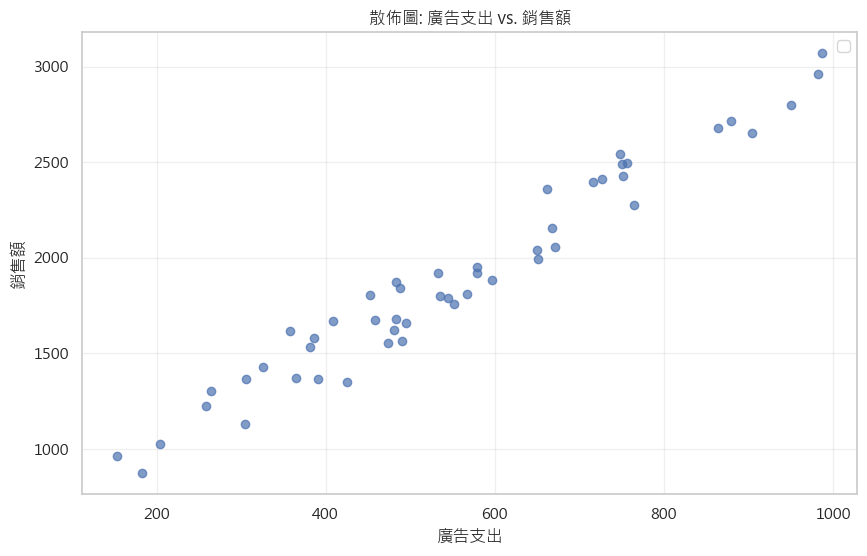

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy import stats

# 設定中文字體
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑體
plt.rcParams['axes.unicode_minus'] = False    # 正確顯示負號

# 1. 時間數列資料的整理與呈現
print("時間數列資料範例:")

# 創建時間序列數據
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
n_days = len(dates)

# 創建銷售數據（有趨勢和季節性）
trend = np.linspace(100, 150, n_days)  # 上升趨勢
seasonality = 15 * np.sin(2 * np.pi * np.arange(n_days) / 365)  # 年度季節性
noise = np.random.normal(0, 5, n_days)  # 隨機波動

sales = trend + seasonality + noise

# 創建DataFrame
time_series_data = pd.DataFrame({
    'date': dates,
    'sales': sales
})
time_series_data.set_index('date', inplace=True)

# 計算移動平均以平滑數據
time_series_data['MA_7'] = time_series_data['sales'].rolling(window=7).mean()
time_series_data['MA_30'] = time_series_data['sales'].rolling(window=30).mean()

print("前10天銷售數據:")
print(time_series_data.head(10))

# 繪製時間數列圖
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['sales'], label='每日銷售額', alpha=0.7)
# plt.plot(time_series_data.index, time_series_data['MA_7'], label='7天移動平均', color='red', linewidth=2)
# plt.plot(time_series_data.index, time_series_data['MA_30'], label='30天移動平均', color='green', linewidth=2)
plt.title('時間數列圖: 銷售額趨勢')
plt.xlabel('日期')
plt.ylabel('銷售額')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 2. 兩組數量資料的整理與呈現
print("\n兩組數量資料範例:")

# 創建兩組相關的數據
np.random.seed(123)
ad_spend = np.random.uniform(100, 1000, 50)  # 廣告支出
# 銷售額與廣告支出相關，但帶有隨機性
sales_related = 500 + 2.5 * ad_spend + np.random.normal(0, 100, 50)

# 創建DataFrame
two_var_data = pd.DataFrame({
    'ad_spend': ad_spend,
    'sales': sales_related
})

print("兩變量數據前10行:")
print(two_var_data.head(10))

# 計算相關係數
correlation = two_var_data['ad_spend'].corr(two_var_data['sales'])
print(f"廣告支出與銷售額的相關係數: {correlation:.3f}")

# 繪製散佈圖與趨勢線
plt.figure(figsize=(10, 6))
plt.scatter(two_var_data['ad_spend'], two_var_data['sales'], alpha=0.7)

# 計算趨勢線
z = np.polyfit(two_var_data['ad_spend'], two_var_data['sales'], 1)
p = np.poly1d(z)
# plt.plot(two_var_data['ad_spend'], p(two_var_data['ad_spend']), "r--", linewidth=2, 
#          label=f'趨勢線: y = {z[0]:.2f}x + {z[1]:.2f}')

plt.title('散佈圖: 廣告支出 vs. 銷售額')
plt.xlabel('廣告支出')
plt.ylabel('銷售額')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
